In [2]:
# Numerical computation
import numpy as np

# Data handling
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Shape of dataset
df.shape


(1000, 8)

In [5]:
# Column names
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

df['result'] = df['average_score'].apply(lambda x: 1 if x >= 40 else 0)

df[['average_score', 'result']].head()


,average_score,result
0,72.666667,1
1,82.333333,1
2,92.666667,1
3,49.333333,1
4,76.333333,1


In [10]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")


In [11]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['result'] = df['average_score'].apply(lambda x: 1 if x >= 40 else 0)


In [12]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 1000
Columns: 10


In [13]:
df.dtypes


gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
average_score                  float64
result                           int64
dtype: object

In [14]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 
                    'lunch', 'test preparation course']

for col in categorical_cols:
    print(f"\n{col} unique values:")
    print(df[col].value_counts())



gender unique values:
gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity unique values:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level of education unique values:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch unique values:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course unique values:
test preparation course
none         642
completed    358
Name: count, dtype: int64


In [15]:
df[['math score', 'reading score', 'writing score', 'average_score']].describe()


,math score,reading score,writing score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [16]:
df['result'].value_counts()


result
1    970
0     30
Name: count, dtype: int64

In [17]:
df['result'].value_counts(normalize=True) * 100


result
1    97.0
0     3.0
Name: proportion, dtype: float64

In [18]:
df.groupby('gender')['average_score'].mean()


gender
female    69.569498
male      65.837483
Name: average_score, dtype: float64

In [19]:
df.groupby('test preparation course')['average_score'].mean()


test preparation course
completed    72.669460
none         65.038941
Name: average_score, dtype: float64

In [20]:
df.groupby('lunch')['average_score'].mean()


lunch
free/reduced    62.199061
standard        70.837209
Name: average_score, dtype: float64

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("StudentsPerformance.csv")

df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['result'] = df['average_score'].apply(lambda x: 1 if x >= 40 else 0)


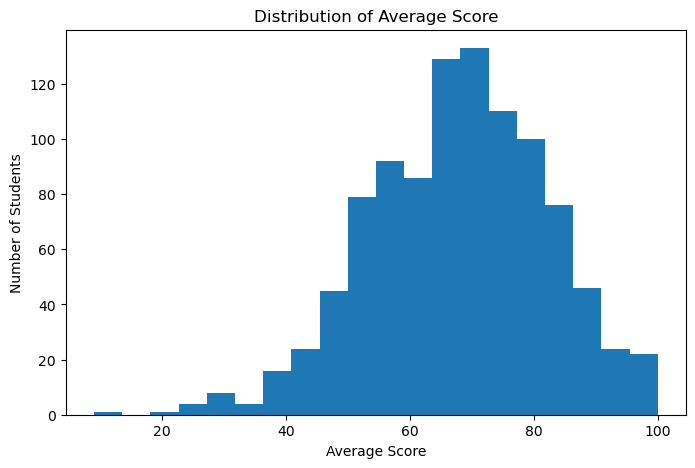

In [22]:
plt.figure(figsize=(8,5))
plt.hist(df['average_score'], bins=20)
plt.title("Distribution of Average Score")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.show()


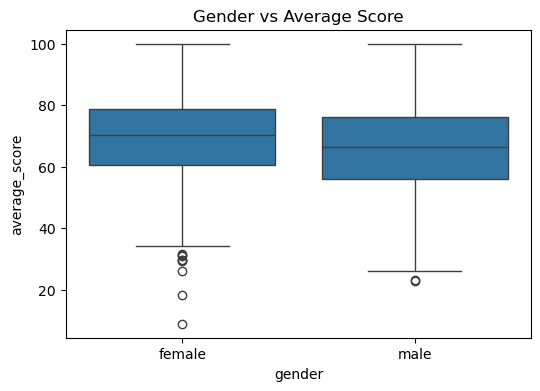

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='average_score', data=df)
plt.title("Gender vs Average Score")
plt.show()


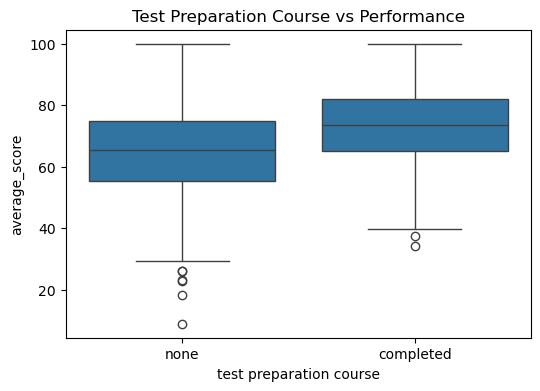

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title("Test Preparation Course vs Performance")
plt.show()


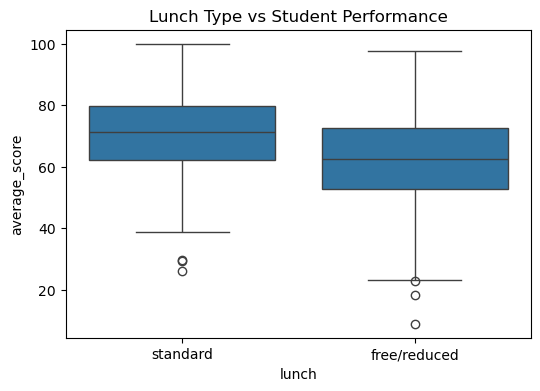

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x='lunch', y='average_score', data=df)
plt.title("Lunch Type vs Student Performance")
plt.show()


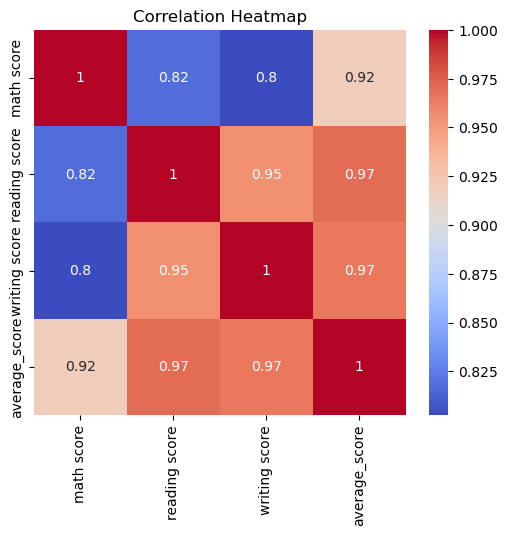

In [26]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['math score', 'reading score', 'writing score', 'average_score']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


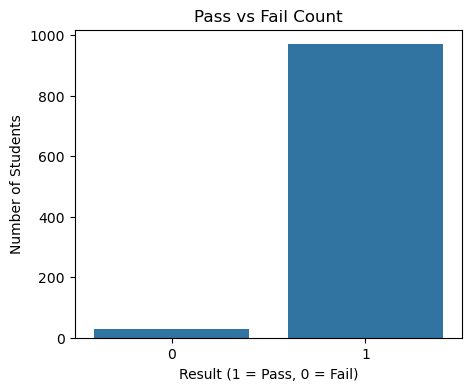

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x='result', data=df)
plt.title("Pass vs Fail Count")
plt.xlabel("Result (1 = Pass, 0 = Fail)")
plt.ylabel("Number of Students")
plt.show()


In [28]:
# day 4

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("StudentsPerformance.csv")

# Create target variable
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['result'] = df['average_score'].apply(lambda x: 1 if x >= 40 else 0)


In [30]:
df = df.drop(columns=['math score', 'reading score', 'writing score', 'average_score'])


In [31]:
X = df.drop('result', axis=1)
y = df['result']


In [32]:
le = LabelEncoder()

for col in X.columns:
    X[col] = le.fit_transform(X[col])


In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [35]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (800, 5)
Testing Data Shape: (200, 5)


In [36]:
# day 5

In [37]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [39]:
print("Logistic Regression trained:", log_model)
print("Random Forest trained:", rf_model)


Logistic Regression trained: LogisticRegression(max_iter=1000)
Random Forest trained: RandomForestClassifier(max_depth=10, random_state=42)


In [40]:
# day 6

In [41]:
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)


In [42]:
from sklearn.metrics import accuracy_score

log_acc = accuracy_score(y_test, log_pred)
rf_acc = accuracy_score(y_test, rf_pred)

print("Logistic Regression Accuracy:", log_acc)
print("Random Forest Accuracy:", rf_acc)


Logistic Regression Accuracy: 0.95
Random Forest Accuracy: 0.95


In [43]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:\n")
print(classification_report(y_test, log_pred))

print("Random Forest Report:\n")
print(classification_report(y_test, rf_pred))


Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.95      1.00      0.97       190

    accuracy                           0.95       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.90      0.95      0.93       200

Random Forest Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.95      1.00      0.97       190

    accuracy                           0.95       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.90      0.95      0.93       200



In [44]:
from sklearn.metrics import confusion_matrix

log_cm = confusion_matrix(y_test, log_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print("Logistic Regression Confusion Matrix:\n", log_cm)
print("Random Forest Confusion Matrix:\n", rf_cm)


Logistic Regression Confusion Matrix:
 [[  0  10]
 [  0 190]]
Random Forest Confusion Matrix:
 [[  0  10]
 [  0 190]]


In [45]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [log_acc, rf_acc]
})

comparison_df


,Model,Accuracy
0,Logistic Regression,0.95
1,Random Forest,0.95


In [46]:
# day 7

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}


In [48]:
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [49]:
grid_search.best_params_


{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}

In [50]:
best_rf_model = grid_search.best_estimator_


In [51]:
grid_search.best_score_


np.float64(0.975)

In [52]:
# day 8

In [55]:
import pickle

pickle.dump(best_rf_model, open("student_performance_model.pkl", "wb"))


In [60]:
# student_performance_model.pkl


In [61]:
import joblib

joblib.dump(best_rf_model, "student_performance_model.joblib")


['student_performance_model.joblib']

In [62]:
loaded_model = joblib.load("student_performance_model.joblib")


In [63]:
sample_prediction = loaded_model.predict(X_test[:5])
sample_prediction


array([1, 1, 1, 1, 1])

In [64]:
import os
os.listdir()


['.ipynb_checkpoints',
 'My Music',
 'My Pictures',
 'My Videos',
 'StudentsPerformance.csv',
 'student_performance_model.joblib',
 'student_performance_model.pkl',
 'Student_Performance_Prediction.ipynb']